# TP : Python, Numpy, Pandas and linear regression
### ZHANG Bolong

In [38]:
%matplotlib notebook

In [ ]:
import pandas as pd
from os import path
import urllib
import zipfile
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [42]:
# download part if needed.
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)
# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']

df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)

In [43]:
df.head()

,Date,Time,Global_active_power,Sub_metering_1
0,16/12/2006,17:24:00,4.216,0.0
1,16/12/2006,17:25:00,5.360,0.0
2,16/12/2006,17:26:00,5.374,0.0
3,16/12/2006,17:27:00,5.388,0.0
4,16/12/2006,17:28:00,3.666,0.0


In [44]:
df.describe()

,Global_active_power,Sub_metering_1
count,196268.000000,196268.000000
mean,1.352544,1.224051
std,1.280684,6.464399
min,0.104000,0.000000
25%,0.314000,0.000000
50%,1.072000,0.000000
75%,1.992500,0.000000
max,10.670000,77.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
Date                   200000 non-null object
Time                   200000 non-null object
Global_active_power    196268 non-null float64
Sub_metering_1         196268 non-null float64
dtypes: float64(2), object(2)
memory usage: 6.1+ MB


## Exercice 1.  Analysis electricity consumption

### Question 1
a) Count the number of rows where Global_active_power or Sub_metering_1 are missing

In [46]:
df.shape[0] - df.count()

Date                      0
Time                      0
Global_active_power    3732
Sub_metering_1         3732
dtype: int64

b) Remove these rows.

In [47]:
df = df.dropna()
df.head()

,Date,Time,Global_active_power,Sub_metering_1
0,16/12/2006,17:24:00,4.216,0.0
1,16/12/2006,17:25:00,5.360,0.0
2,16/12/2006,17:26:00,5.374,0.0
3,16/12/2006,17:27:00,5.388,0.0
4,16/12/2006,17:28:00,3.666,0.0


### Question 2
Now scale the variable Sub_metering_1 to have the same unit as Global_active_power.<Br>
So we need transform "watt-hour" to "kilowatt-minute".

In [48]:
df.Sub_metering_1 = df.Sub_metering_1 * 60.0 / 1000.0

In [49]:
df[df.Sub_metering_1 != 0.0]

,Date,Time,Global_active_power,Sub_metering_1
1019,17/12/2006,10:23:00,2.242,0.06
1020,17/12/2006,10:24:00,3.714,0.12
1021,17/12/2006,10:25:00,3.212,0.06
1022,17/12/2006,10:26:00,3.694,0.06
1023,17/12/2006,10:27:00,3.204,0.06
1024,17/12/2006,10:28:00,3.676,0.06
1025,17/12/2006,10:29:00,3.666,0.12
1026,17/12/2006,10:30:00,3.678,0.06
1027,17/12/2006,10:31:00,3.722,0.06
1028,17/12/2006,10:32:00,3.716,0.06


### Question 3
a) Use to_datetime to create a Time Series.

In [50]:
new_index = pd.to_datetime(df.Date + df.Time, format='%d/%m/%Y%H:%M:%S')

b) Use set_index to index the dataframe by timestamps.

In [51]:
df.set_index(new_index, inplace=True)
del df['Date']
del df['Time']
df.head()

,Global_active_power,Sub_metering_1
2006-12-16 17:24:00,4.216,0.0
2006-12-16 17:25:00,5.360,0.0
2006-12-16 17:26:00,5.374,0.0
2006-12-16 17:27:00,5.388,0.0
2006-12-16 17:28:00,3.666,0.0


### Question 4
a) Display the graphic of daily averages, between January 1 2007 and April 30 2007.

<IPython.core.display.Javascript object>


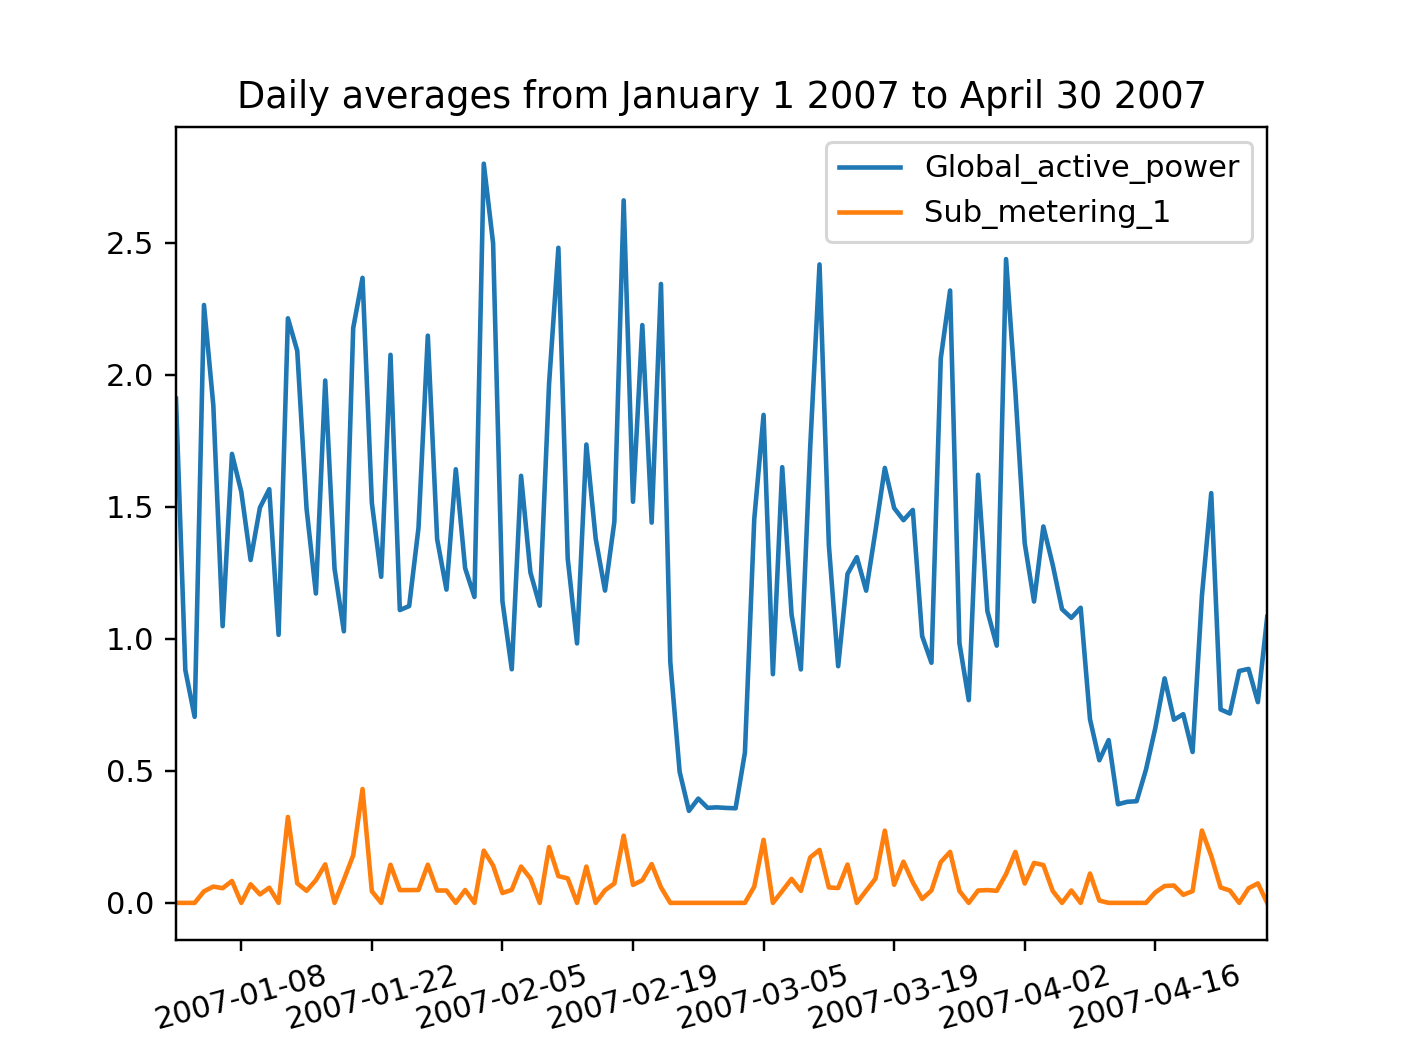

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 2007-01-01 to 2007-04-28
Data columns (total 2 columns):
Global_active_power    118 non-null float64
Sub_metering_1         118 non-null float64
dtypes: float64(2)
memory usage: 2.8+ KB


In [52]:
df1 = df.truncate('2007-1-1', '2007-4-30')
daily_average = df1.groupby(df1.index.date).mean()
daily_average.plot(
    rot=15, title="Daily averages from January 1 2007 to April 30 2007")
daily_average.info()

b) Propose an explanation for the consumption behavior between February 23 and March 3 ? between April 10 and April 15 ?

These two periods are winter vacation and spring vacation. So people may travel outside. The consumption of energy is lower than usual.

### Question 5
a) Display a barplot of the Sub_metering_1 by weekdays.

<IPython.core.display.Javascript object>


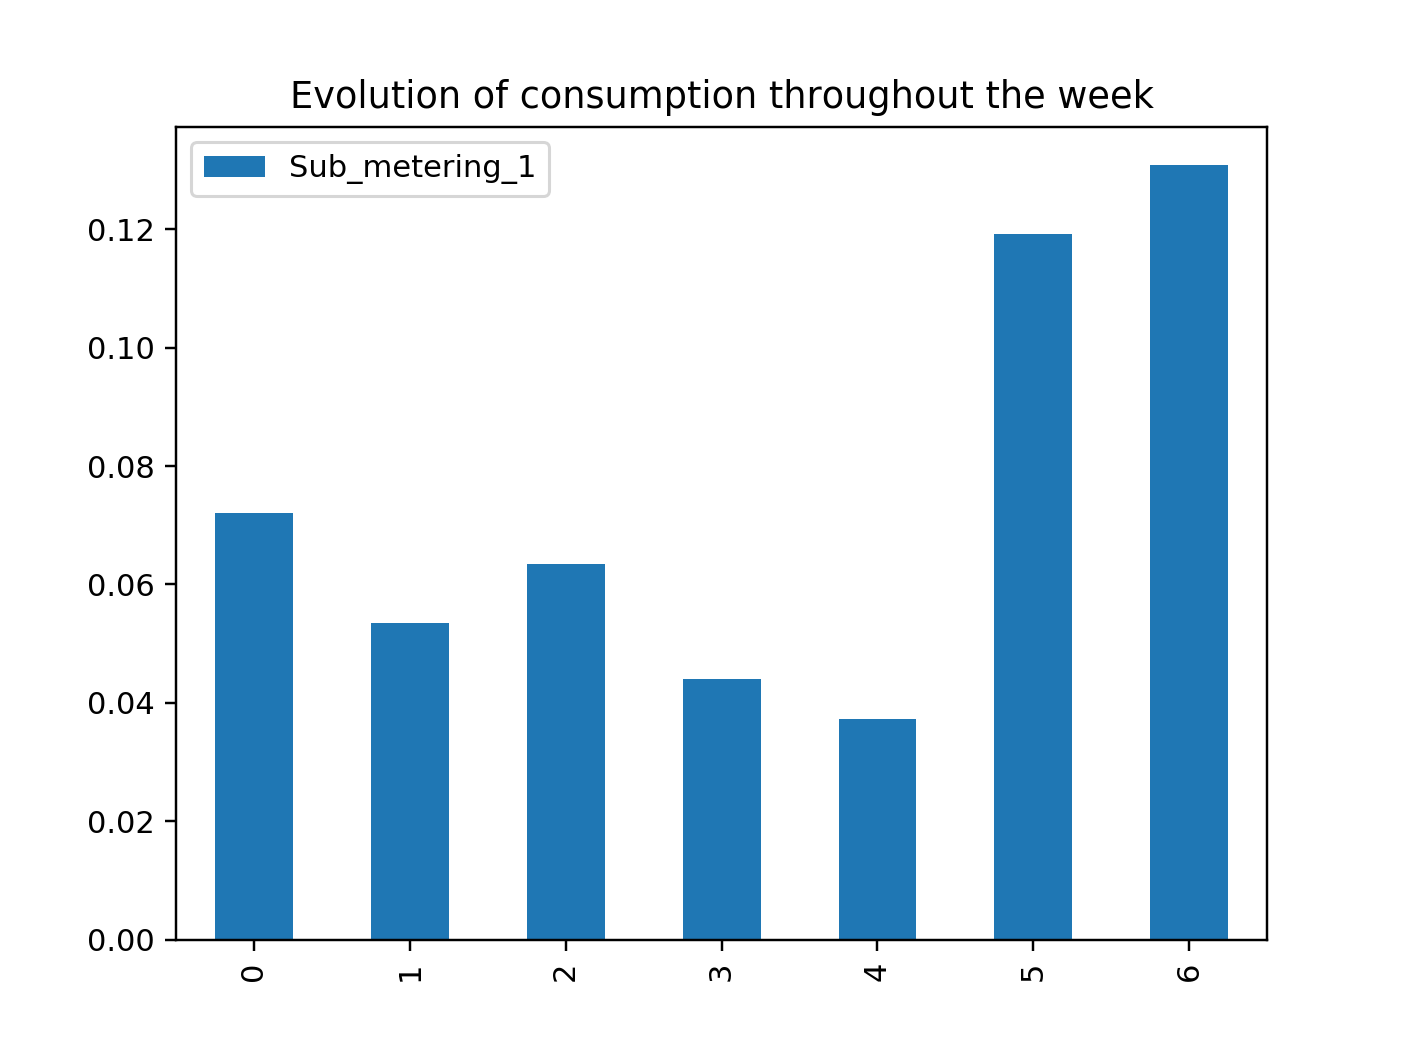

In [53]:
weekday_average = df.groupby(df.index.weekday).mean()
weekday_average.plot(y='Sub_metering_1', kind='bar',
                     title="Evolution of consumption throughout the week")

b) Interpret the evolution of consumption throughout the week.

Weekends, people do not have to work. They will choose to stay home and cook for themselves. So the consumption of energy in the kitchen is higher.

### Question 6
Load the dataset with pandas, and keep only the DATE and TG columns. 

In [54]:
# download part if needed.
url = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/'
filename = 'TG_STAID011249.txt'
na_values = [-9999]

# Detect and count lines with missing values.
fields = ['    DATE', '   TG']

temperature = pd.read_csv(url + filename, sep=',',
                          na_values=na_values, usecols=fields,
                          comment='#')

In [55]:
temperature.head()
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34883 entries, 0 to 34882
Data columns (total 2 columns):
    DATE    34883 non-null int64
   TG       26496 non-null float64
dtypes: float64(1), int64(1)
memory usage: 545.1 KB


Divide by 10 the TG column to get Celsius temperature. Treat missing values as NaNs.

In [56]:
temperature['   TG'] = temperature['   TG'] / 10.0
temperature.head()

,DATE,TG
0,19210301,5.0
1,19210302,4.6
2,19210303,4.6
3,19210304,3.1
4,19210305,9.5


In [57]:
temperature = temperature.dropna()
temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26496 entries, 0 to 34882
Data columns (total 2 columns):
    DATE    26496 non-null int64
   TG       26496 non-null float64
dtypes: float64(1), int64(1)
memory usage: 621.0 KB


### Question 7
a) Create a pandas Time Series of the daily temperatures between January 1 2007 and April 30 2007.

In [58]:
new_index = pd.to_datetime(temperature['    DATE'], format='%Y%m%d')
temperature.set_index(new_index, inplace=True)
del temperature['    DATE']
temperature1 = temperature.truncate('2007-1-1', '2007-4-30')
temperature1.head()

,TG
DATE,
2007-01-01,9.6
2007-01-02,6.0
2007-01-03,6.1
2007-01-04,9.2
2007-01-05,10.0


b) Display on the same graph the temperature and the Global_active_power Time Series.

<IPython.core.display.Javascript object>


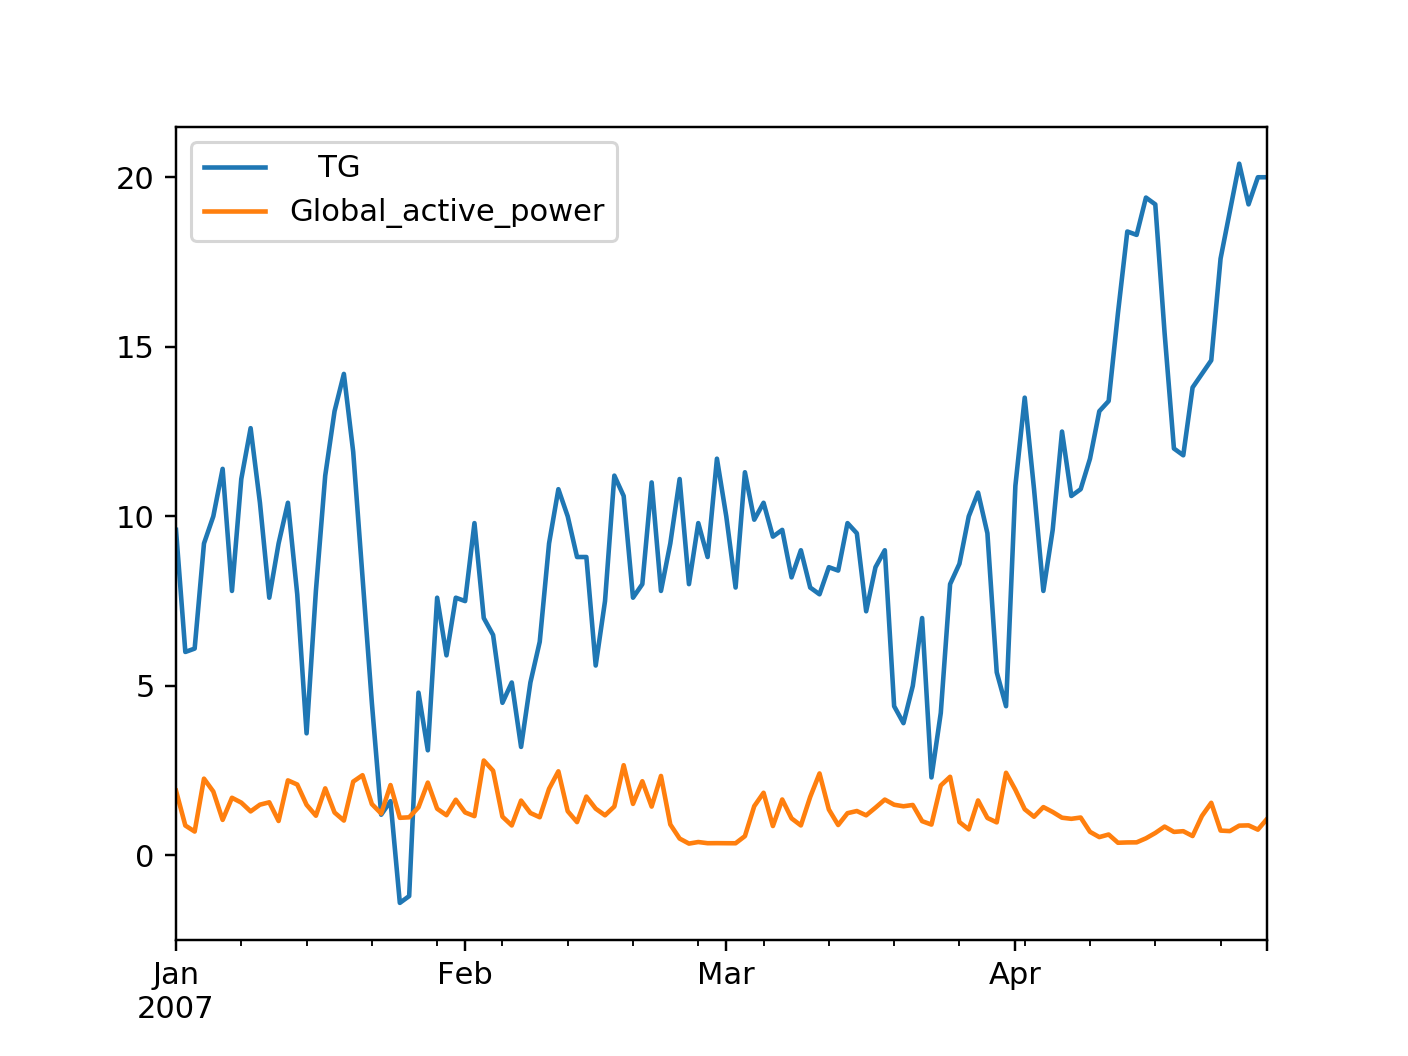

In [59]:
tem_date = pd.merge(temperature1, daily_average.drop('Sub_metering_1', axis=1),
                    left_index=True, right_index=True).plot()

## Exercice 2.  Analysis of the auto-mpg dataset

### Question 8


In [60]:
# download part if needed.
url2 = u'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'

# Detect and count lines with missing values.
fields = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
          'acceleration', 'model year', 'origin', 'car name']

auto = pd.read_csv(url2, sep=r"\s+", header=None, names=fields)
auto = auto.dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


The missing values are marked by "NA" and we have removed them.

### Question 9

In [61]:
auto.origin = auto.origin.replace(1, 'USA')
auto.origin = auto.origin.replace(2, 'Europe')
auto.origin = auto.origin.replace(3, 'Japan')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino


### Question 10

In [62]:
X9 = auto.iloc[0:9, 1:7]
X9 = sm.add_constant(X9)
y9 = auto.mpg[0:9]
results9 = sm.OLS(y9, X9).fit()
results9.params

cylinders       0.049592
displacement    0.054088
horsepower     -0.094531
weight         -0.004241
acceleration   -0.199367
model year      0.433928
dtype: float64

Here, intercept is 0. For the next, we can find prediction vector.

In [63]:
prediction_vector9 = results9.predict(X9)
prediction_vector9

0    17.835934
1    16.151352
2    17.028033
3    16.084149
4    17.152477
5    14.855885
6    14.272661
7    14.265870
8    13.353638
dtype: float64

Through the result based on the first 9 lines of the dataset, we can find that for the estimator, the coefficient "cylinders" is smaller and the coefficient "model year" is bigger than others. That means "model year" has a greater impact on "mpg", and "cylinders" has less effect on "mpg".

### Question 11
Performing scaling/centering to have unit standard deviation and zero mean

In [64]:
X = auto[['cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'model year']]

standard deviation before performing scaling

In [65]:
X_std = X.std()
X_std

cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
model year        3.683737
dtype: float64

mean before performing centering

In [66]:
X = X / X_std
X_mean = X.mean()
X_mean

cylinders        3.207875
displacement     1.857842
horsepower       2.714114
weight           3.505504
acceleration     5.633234
model year      20.625686
dtype: float64

In [67]:
X = X - X_mean

standard deviation after performing scaling/centering

In [68]:
X.std()

cylinders       1.0
displacement    1.0
horsepower      1.0
weight          1.0
acceleration    1.0
model year      1.0
dtype: float64

mean before performing scaling/centering

In [69]:
X.mean()

cylinders      -1.558391e-14
displacement   -1.115887e-16
horsepower      2.435693e-16
weight         -3.489272e-15
acceleration    2.809544e-16
model year      2.573905e-15
dtype: float64

The least-squares estimator

In [70]:
X = sm.add_constant(X)
y = auto.mpg
results = sm.OLS(y, X).fit()
results.params

const           23.445918
cylinders       -0.562668
displacement     0.803502
horsepower      -0.015064
weight          -5.771366
acceleration     0.235257
model year       2.775206
dtype: float64

<IPython.core.display.Javascript object>


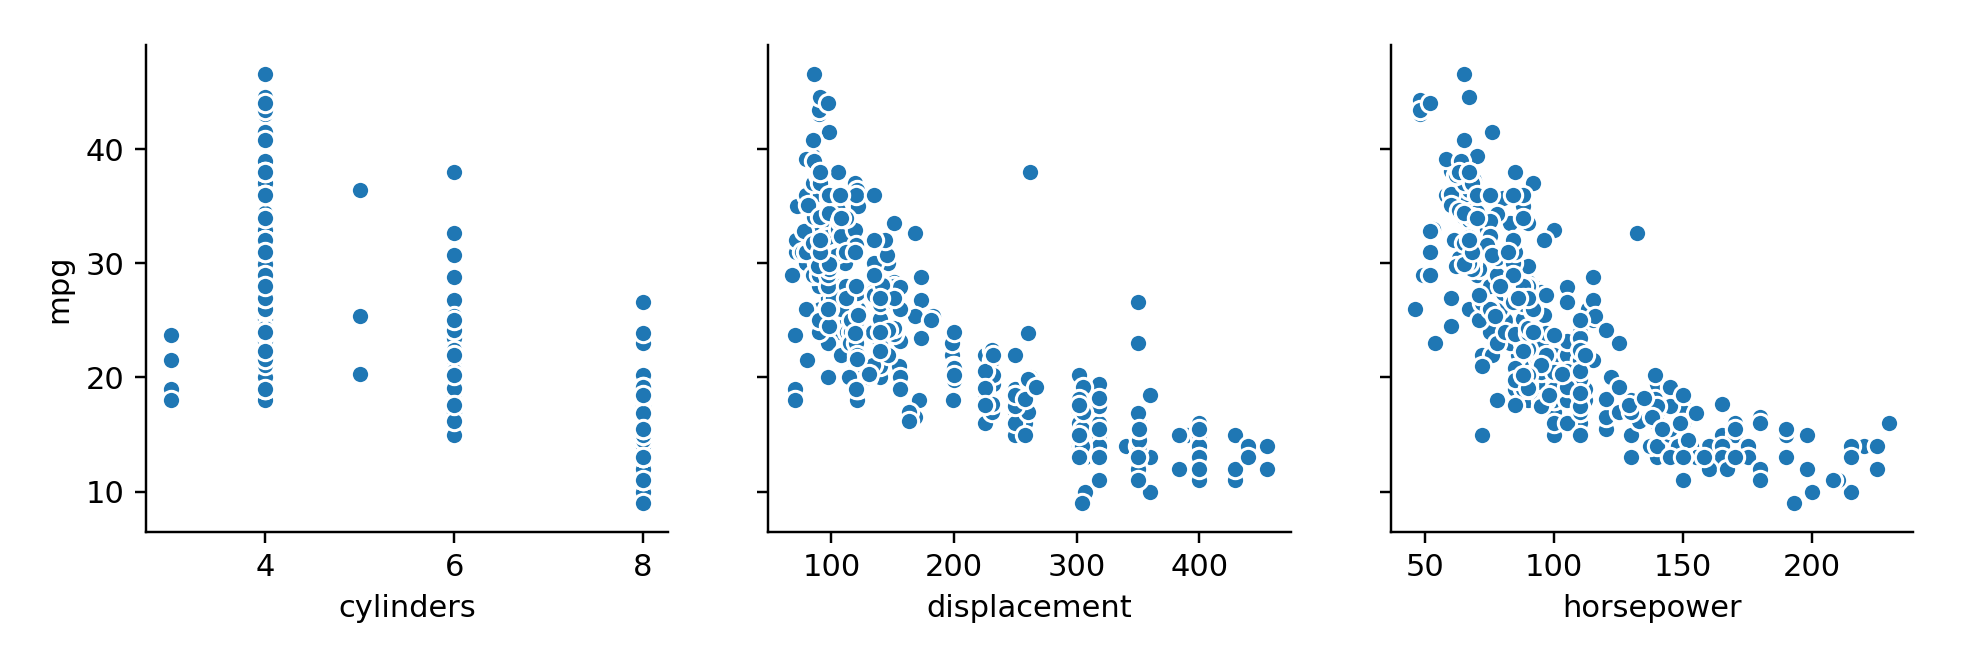

<IPython.core.display.Javascript object>


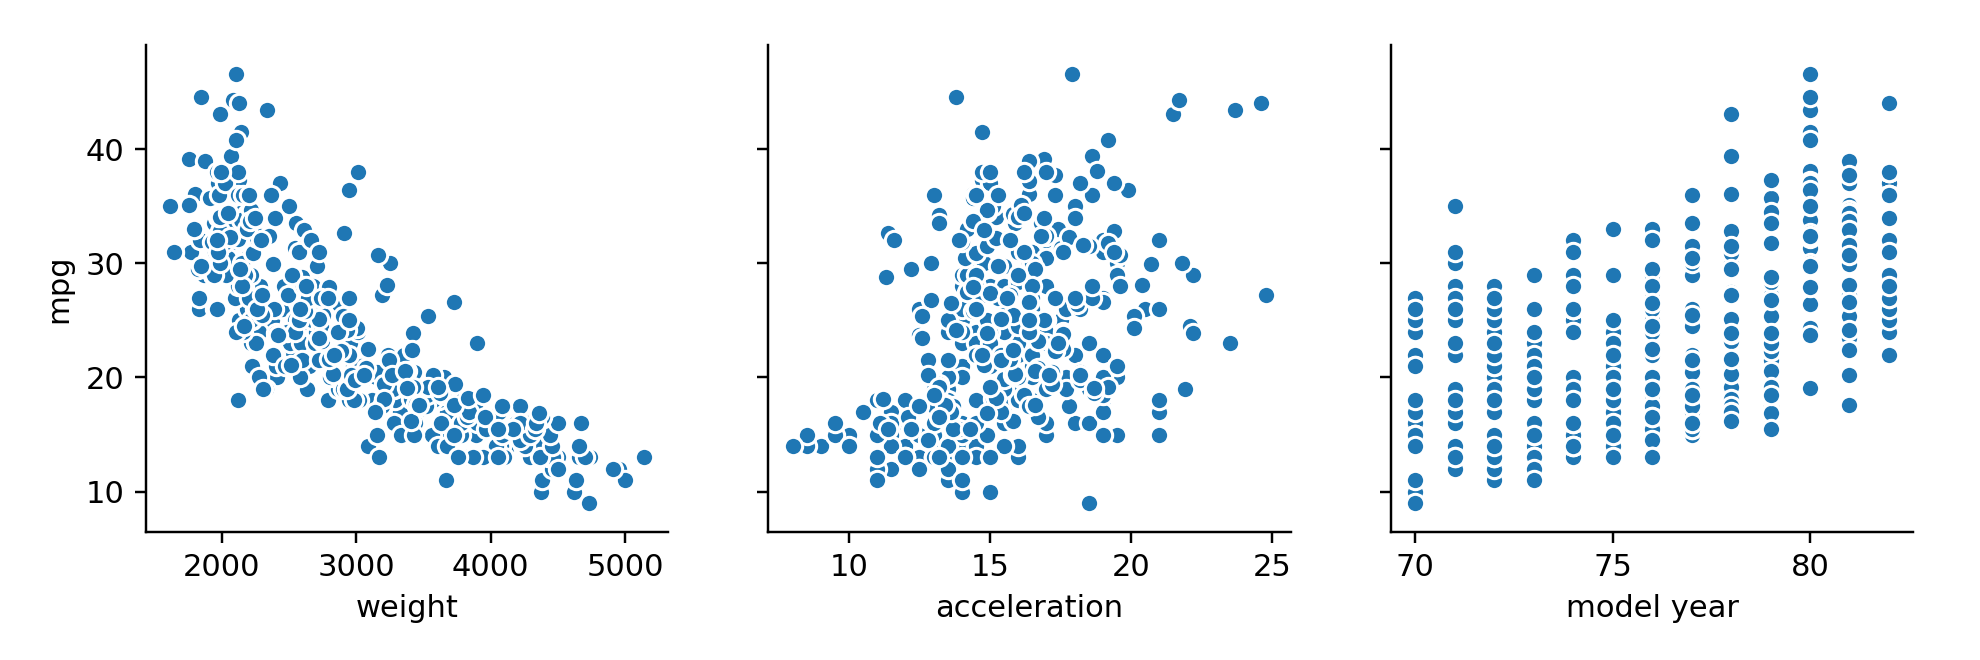

In [71]:
# diagram
sns.pairplot(auto, x_vars=['cylinders', 'displacement',
                           'horsepower'], y_vars='mpg', size=3, aspect=1)
sns.pairplot(auto, x_vars=['weight', 'acceleration',
                           'model year'], y_vars='mpg', size=3, aspect=1)
plt.show()

The prediction vector

In [72]:
prediction_vector = results.predict(X)
prediction_vector.head()

0    15.082919
1    14.072575
2    15.536315
3    15.534475
4    15.286407
dtype: float64

By observing the result of the estimator, the coefficients "weight" and "model year" are biger than others. So it seems that they can best explain gasoline consumption according to my model.

### Question 12

In [73]:
r2 = np.linalg.norm(y - y.mean())**2 - \\n    np.linalg.norm(prediction_vector - y.mean())**2
np.isclose(r2, np.linalg.norm(y - prediction_vector)**2)

True

After checking numerically, the answer is right.

### Question 13

We may predict that the result is:

In [84]:
X_test = np.array([6, 225, 100, 3233, 15.4, 117])
X_test = X_test / X_std - X_mean
X_test = np.concatenate([[1], X_test])
y_predict = results.predict(X_test)
y_predict

array([ 52.66427455])